# Get and explore dataset

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [4]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [5]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [6]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [7]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
#from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

24.676519799219186
11.28405192884278
['1776' '2 years' '200 pages of total immersion italian' ...
 'youre kidding me right' 'yuck just a bad book'
 'yuck yuck and double yuck']
Unique words:1676


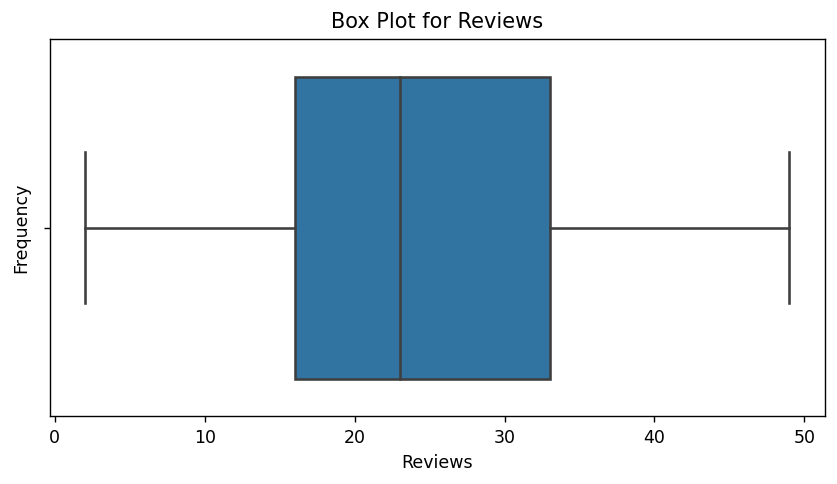

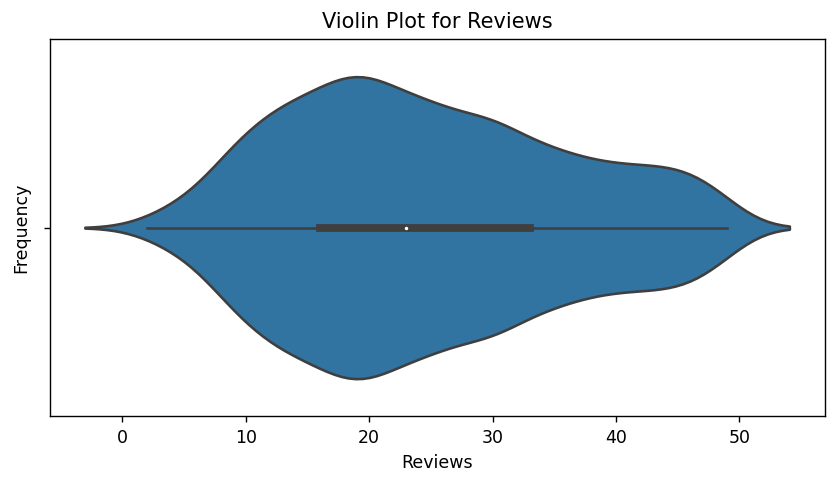

In [8]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
# - Calculate the number of unique words in the dataset
# - Perform any other dataset investigation that you feel would be valuable


# Mean
result = [len(d)for d in data]
data_result = np.array(result)
mean_result = np.mean(data_result)
print(mean_result)

# Standard deviation
std_dev_result = np.std(result, axis=None, dtype=None, out=None, ddof=0)
print(std_dev_result)


# Unique Words in dataset
unique_words = np.unique(data, return_index=False, return_inverse=False, return_counts=False, axis=None)
print(unique_words)
num_unique_words = (len(unique_words))
print('Unique words:{}'.format(num_unique_words))

# Boxplot
plt.figure(figsize=(8,4),dpi=125)
sns.boxplot(result)
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Box Plot for Reviews')
plt.show()

# Any other dataset investigation

plt.figure(figsize=(8,4),dpi=125)
sns.violinplot(result)
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Violin Plot for Reviews')
plt.show()

In [9]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [10]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

# max_words = 500
# training_data, training_label, test_data, test_label = data(num_words = max_words, skip_top = 50, seed = 113, start_char = 1, oov_char = 2)

# pad_reviews = pad_sequences(
#     data, maxlen= int(mean_result), dtype= 'object', padding='post',
#     truncating='post')

maxlen = int(500)
X = pad_sequences(tokenized_data, maxlen = maxlen)
y = labels



In [11]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, shuffle=True)


In [12]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.


def assess_model(model, X_test, y_test):      
    #To do
    # make predictions on test data
    y_pred = model.predict_classes(X_train, verbose = 0)
    
    #printing precision, recall and f1 score from classification report
    print(classification_report(y_train,y_pred))
    
    # Confusion matrix
    classes = list(model.target_names)
    conf_mat = confusion_matrix(y_train, y_pred)
    print(conf_mat)
    
X_test_data = to_class(X_test)
y_test_data = to_class(y_test)

# Build and tune model

Define network architecture

In [13]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Dense, SpatialDropout1D, BatchNormalization

# Embedding layer
#3 arguments 
# input_dim
# output_dim = try values 10,25,50,100 which gives the best performance on the test set
# and plot a graph of both the accuracy and loss of the model while training.
# input_length

# SpatialDropout1D(0.2)
# BatchNormalization()
# LSTM(32)
# Dense(2, activation='softmax')

model1 = Sequential()
model1.add(Embedding(5000, 50, input_length =500)) #The embedding layer
model1.add(SpatialDropout1D(0.2))
model1.add(BatchNormalization())
model1.add(LSTM(32)) #Our LSTM layer
model1.add(Dense(2,activation='softmax'))






Train model

In [14]:
# Training parameters
# batch_size = 10
# epochs = 5

# Tune the output_dim hyper-parameter of the embedding layer. Try values:
# 10, 25, 50 and 100. Report on the performance metrics for each value.

# Select the output_dim which gives the best performance on the test set
# and plot a graph of both the accuracy and loss of the model while training.
# Use these graphs to determine the point at which the model starts to overfit
# or if it has not yet converged. Identify a more optimal number of epochs to
# train for.

# You can also try tuning other metrics — such as batch size — to get the best
# possible performance.
# Report on the performance metrics of the final model.

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
print(model1.summary())
train_model = model1.fit(X_train, y_train, epochs=5, batch_size=10, verbose=2)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           250000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 50)          0         
 ropout1D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 500, 50)          200       
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 260,890
Trainable params: 260,790
Non-trai

In [18]:
train_model.history

{'loss': [0.6829413175582886,
  0.6551902890205383,
  0.6492462158203125,
  0.6378328800201416,
  0.6360647082328796],
 'accuracy': [0.5453277826309204,
  0.6129707098007202,
  0.6025104522705078,
  0.6227335929870605,
  0.6262203454971313]}

Examine performance of model

In [19]:
# Changing the numbers, types and sizes of layers, the sizes of filters, using different padding this affects the models
# performance. It changes the output shape and increases the parameters. Changing the hyper parameters allows it to fit to
# the training data better. However,the test time performance does not necessarily get better.

# Using output_dim hyper - paramater:

# 10 - . The performance was much faster. However accuracy and loss were both similar. The accuracy was lower then the loss.


# 25 - The performance gets better but timing runs longer. However accuracy improved but still low accuracy.

# 50 - the time performance is much longer, the output shape changes but this allows to fit the data better. The accuracy
# improved much higher compared to the other values used.


# 100 - with this value, the model ran much longer. The time performance decreased.There was a higher loss with less accuracy.

# I used value 50 for the output_dim as I saw better performance.

Plot graphs for accuracy and loss

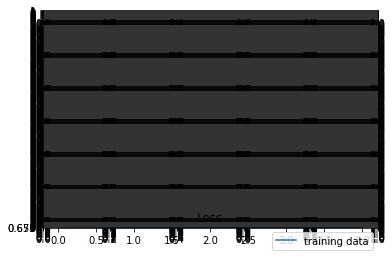

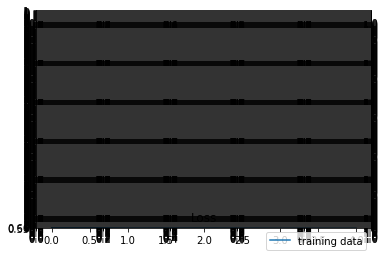

In [20]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

pyplot.subplots(211)
pyplot.title("Loss")
pyplot.plot(train_model.history["loss"], label = "training data")
#pyplot.plot(train_model.history["loss_value"], label = "training data")
pyplot.legend()

# Plotting accuracies
pyplot.subplots(212)
pyplot.title("Loss")
pyplot.plot(train_model.history["accuracy"], label = "training data")
pyplot.legend()

pyplot.show()

# Make a prediction

In [25]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

pred = model1.predict(padded)
print(pred)
class_result = to_word_label(pred)
print(class_result)
 


[[0.3068713  0.6931287 ]
 [0.3068713  0.69312876]
 [0.3068713  0.69312876]
 [0.3068713  0.69312876]
 [0.3068713  0.69312876]]
['negative', 'negative', 'negative', 'negative', 'negative']
